### k-Nächste Nachbarn Verfahren auf dem MNIST Datensatz aus Sklearn
##### Welches k erreicht die beste Genauigkeit?
- siehe Notebook MNIST kNN 8x8.ipynb

#### Versionsgeschichte

- 1.0 20.10.2023 Willi Hahn Initialversion
    
      


In [1]:
# Bibliotheken laden
# falls noch nicht installiert, siehe Vorlesung 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Daten einlesen. Sie sind bereits in der Sklearn Bibliothek als "Hello World" Beispiel
digits = datasets.load_digits()
X = digits['images']
y = digits['target']
target_names = digits['target_names']
print(f'Images (x) Shape : {X.shape}')
print(f'Target (y) Shape : {y.shape}')
# 8x8 Matrix als 64-stelligen Vektor wandeln
n_samples = len(X)
X = X.reshape((n_samples, -1))
# Traiinings-/ Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(X_test.shape)

Images (x) Shape : (1797, 8, 8)
Target (y) Shape : (1797,)
(1437, 64)
(360, 64)


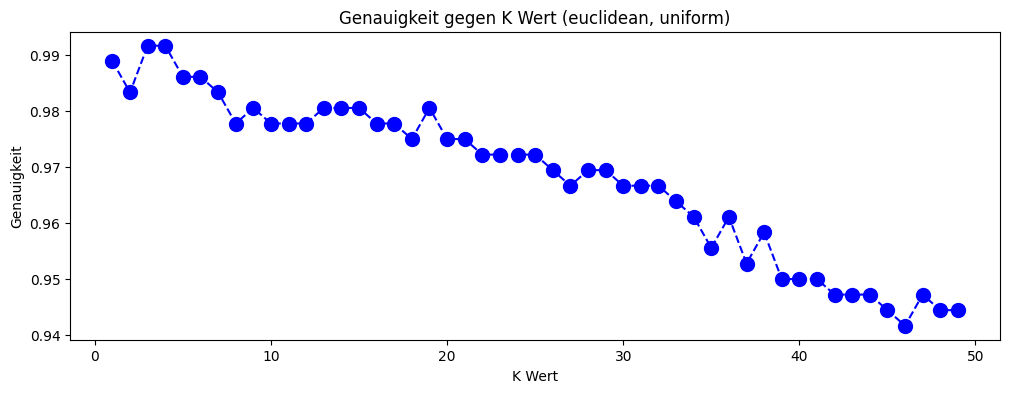

In [5]:
# Optimalen Hyperparameter k für k-Nearest Neighbors bestimmen

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as met 
import matplotlib.pyplot as plt 

acc = []
rec = []
pre = []
f1s = []
# Berechne Maßzahlen der Vorhersagequalität für K Werte zwischen 1 and 20
maxrange=50
WEIGHTS='uniform'  # ‘uniform’, ‘distance’} or callable, default=’uniform’
METRIC='euclidean'  # euclidean cityblock cosine
for N_NEIGHBORS in range(1, maxrange):
    knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, weights=WEIGHTS, n_jobs=-1
                              , metric = METRIC)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = met.confusion_matrix(y_test, y_pred)
    acc.append(met.accuracy_score(y_test, y_pred))
# siehe https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
# für Mittelung der Genauigkeit bei Multiklassen-Klassifikationen.
    rec.append(met.recall_score(y_test, y_pred, average='micro'))
    pre.append(met.precision_score(y_test, y_pred, average='micro'))
    f1s.append(met.f1_score(y_test, y_pred, average='micro'))

figsizex=12
figsizey=4
_ = plt.figure(figsize=(figsizex, figsizey))
_ = plt.plot(range(1, maxrange), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
_ = plt.title('Genauigkeit gegen K Wert ('+ METRIC + ", " +WEIGHTS+')')
_ = plt.xlabel('K Wert')
_ = plt.ylabel('Genauigkeit')


